In [1]:
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import numpy as np
import pandas as pd
import torch
from load import getLatentFromModel, addMetadataFromPandas

# This is user input, in case you need to start from just the data and the loaded model, otherwise use any of the other getLatentFrom* functions
from yourClass import YourDataset

In [2]:
# Read in your data and model
data = YourDataset("/path/to/input_data/*.tif")
model = torch.load("/path/to/trained/model")

Loading images: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 541049/541049 [05:12<00:00, 1733.85im/s]


In [4]:
latent = getLatentFromModel(model, data, device = torch.device("cuda", 0))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2114/2114 [00:46<00:00, 45.29it/s]


In [9]:
metadata_df = pd.read_csv("/path/to/your/metadata.csv")

In [11]:
adata = ad.AnnData(data, dtype=data.dtype)
adata.obsm["latent"] = latent

In [12]:
addMetadataFromPandas(adata, metadata_df)

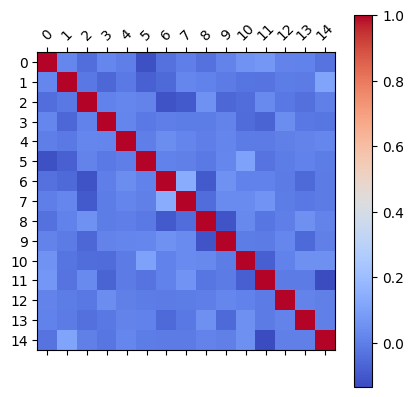

In [13]:
from plotCorrelation import plotLatentCorrelation
plotLatentCorrelation(adata, latent_key="latent")

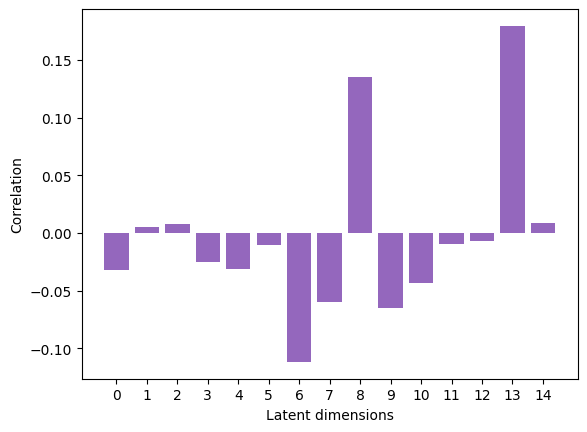

In [14]:
from plotCorrelation import plotLatentCorrelationWithMetaVariable
plotLatentCorrelationWithMetaVariable(adata, "latent", "YourVariable")